## Introduction

This dataset consists of data from the WineEnthusiast.

The data set source for this model is collected from Sommelier reviews and ratings, the location and specific wineries. The data consists of wine reviews with variety, location, winery, price, rating and description.

The objective of this report is to perform exploratory data analysis to create visuals that allow us to highlight how different aspects of the data relate as well as create models to help predict beneficial wine making practices. It includes a selection of univariate and bivariate analysis to achieve this.



In [1]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno
import squarify
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud



## Reading the Data

In [4]:
# Reading in all of our data
wine = pd.read_csv("wine.csv", encoding = 'utf-8' )

# Viewing the first 5 rows of dataset for clarity
wine.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


In [5]:
# View statistics
wine.describe()

,Unnamed: 0,points,price
count,1103.000000,1103.000000,1046.000000
mean,551.000000,89.701723,40.242830
std,318.552978,2.390405,32.588141
min,0.000000,85.000000,7.000000
25%,275.500000,88.000000,20.000000
50%,551.000000,90.000000,31.000000
75%,826.500000,91.000000,50.000000
max,1102.000000,96.000000,500.000000


In [6]:
# View all columns
wine.columns.tolist()

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

In [7]:
# Checking data type of columns
wine.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

### Data Summary

As we can observe, we have;

country - [String][Categorical] - The country the wine is from

description - [String][Categorical] - A decription of the wine itself

designation - [String][Categorical] - Name of the wine given by owner/producer

points - [Integer][Categorical] - The critical rating of the wine (100 = Best)

price  - [Integer][Continuous] - The cost of the wine

province - [String][Categorical] - The province the wine is from

region_1 - [String][Categorical] - The region the wine is from

region_2 - [String][Categorical] - The region the wine is from

variety - [String][Categorical] - The type of wine it is

winery - [String][Categorical] - The winery the wine was produced
 


## Cleaning the Data

### Dropping irrelevant columns

The 'Unnamed' column repeats the numbers assigned to the rows thus is not neded so we will drop this column. The 'description', 'designation' and 'winery' columns are irrelevant to our investigation so we will also drop these.

In [8]:
# Dropping irrelevant columns
wine.drop(['Unnamed: 0', 'description', 'winery'],axis=1, inplace=True)

# Viewing dataset
wine.head()

,country,designation,points,price,province,region_1,region_2,variety
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon
1,Spain,Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir
4,France,La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend


### Checking For Duplicate Rows and Deleting

In [9]:
# Checking for duplicate rows
wine.duplicated(keep=False)

# Removing duplicate rows
wine.drop_duplicates()

,country,designation,points,price,province,region_1,region_2,variety
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon
1,Spain,Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir
4,France,La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend
...,...,...,...,...,...,...,...,...
1098,US,NaN,87,12.0,California,California,California Other,White Blend
1099,US,Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling
1100,US,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot
1101,France,NaN,87,27.0,Bordeaux,Listrac-M√©doc,NaN,Bordeaux-style Red Blend


### Checking for Missing Values and Cleaning Dataset Accordingly

Creating a graphic matrix to visualise whereabouts the missing data is.

In [10]:
# get the number of missing data points per column
missing_values_count = wine.isnull().sum()

# look at the number of missing points in all the columns
missing_values_count[:,]


country          0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
dtype: int64

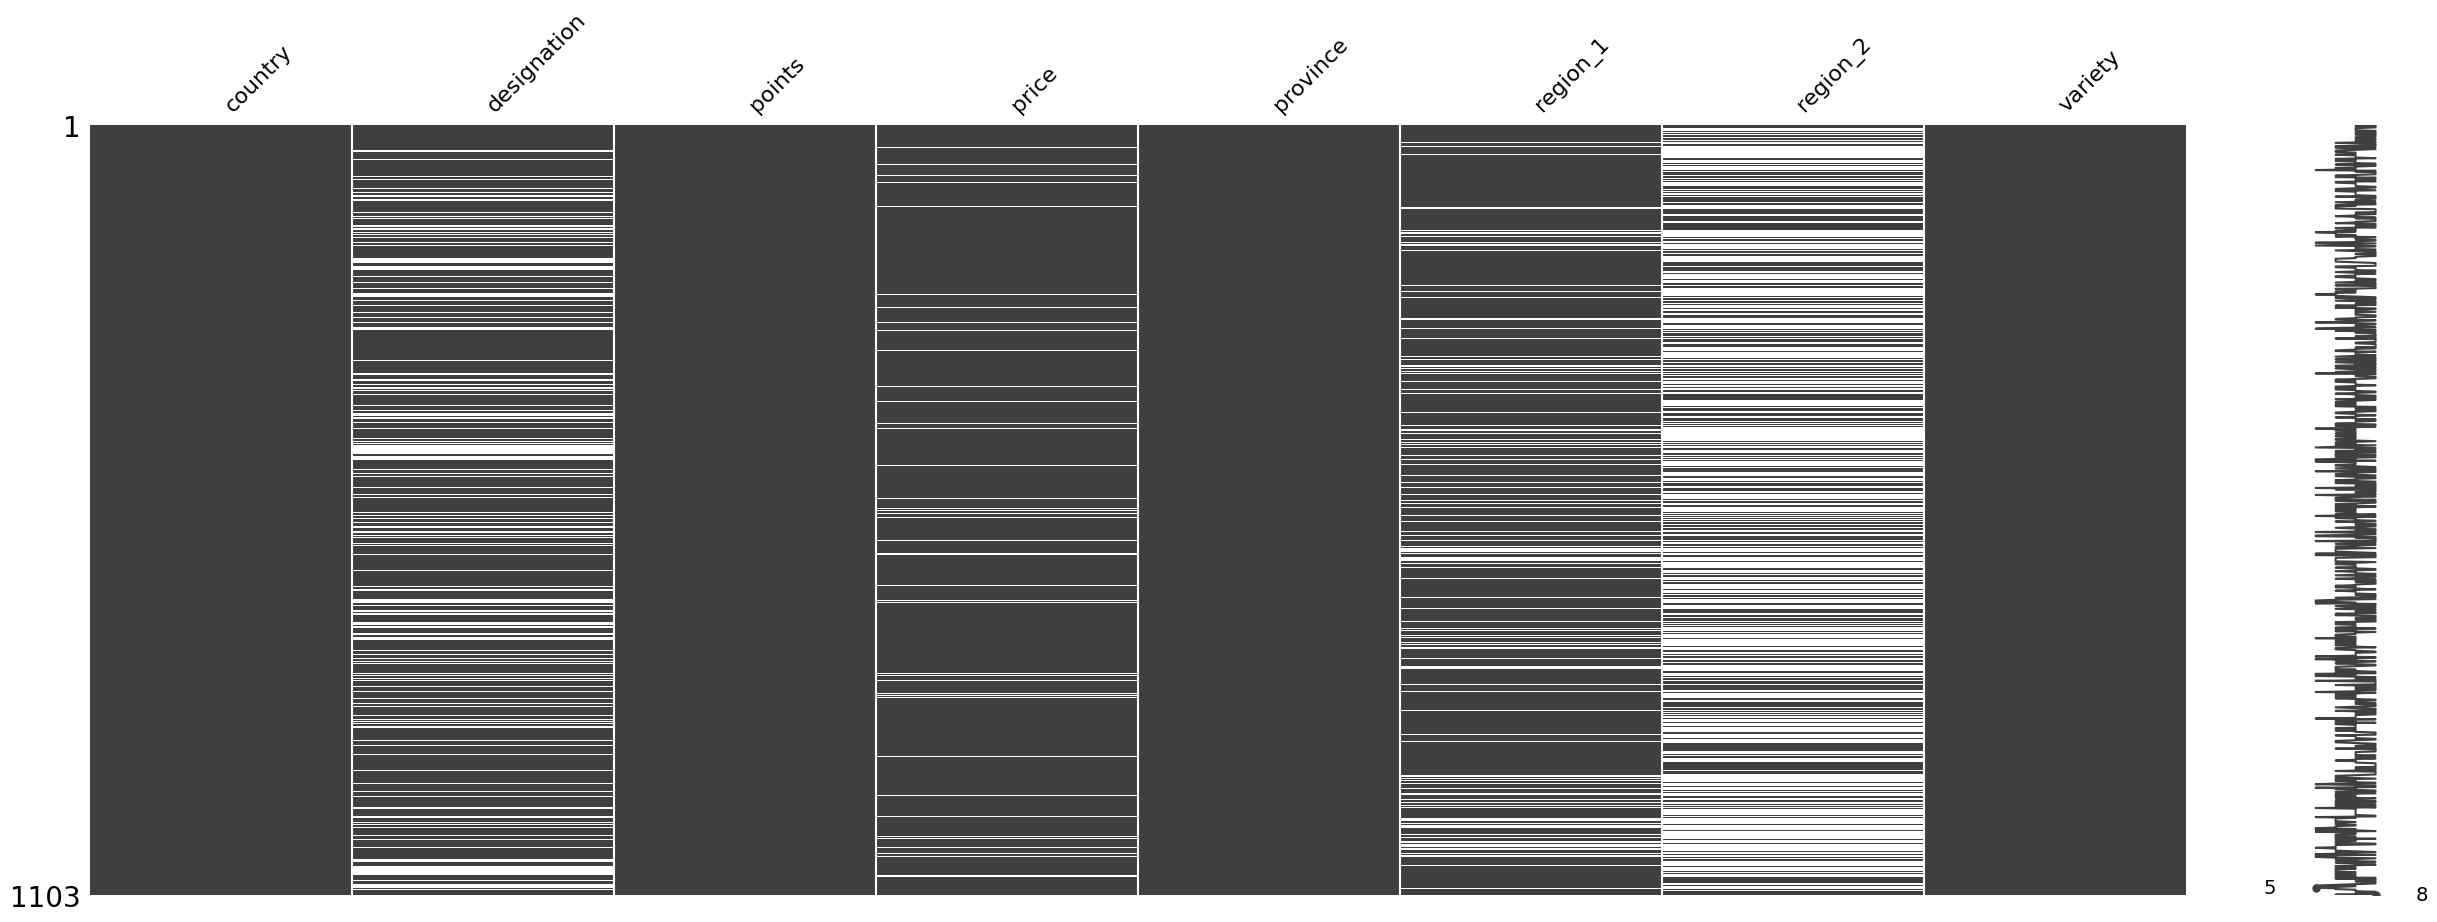

In [11]:
# Creating matrix of missing values
missingno.matrix(wine, figsize = (30,10));

As we can see the 'Designation' of the wine has a moderate amount of mising values. This is missing completely at random (MCAR). As the designated name of the wine does not affect our investigation we can drop this column

In [12]:
# Dropping the column 'designation'
wine.drop('designation',axis=1, inplace=True)
wine.head()

,country,points,price,province,region_1,region_2,variety
0,US,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro
2,US,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc
3,US,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir
4,France,95,66.0,Provence,Bandol,NaN,Provence red blend


The price of the wine has a few values missing at random (MAR). The price of the wine is likely to be related to other variables such as the variety and the region it comes from. A wine is rated with 'points' taking these factors into account thus the price most likely has a positive corrleation with points which can be seen in a scatterplot. As the points are in descending order within our dataset, we can replace all missing values with the value that comes directly after it in the price column to impute the missing values.

In [13]:
# Replacing all missing values in 'price' column with values that comes directly after it. 
# Then viewing the first missing value in price to confirm S
wine["price"].fillna(method = 'bfill', axis=0, inplace=True)
wine.iloc[32:33]

,country,points,price,province,region_1,region_2,variety
32,Italy,90,22.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese


region_2 has a large amount of missing values. We also have a region_1 for each wine and this has much less missing values. These values are missing not at random (MNAR) as some wines do not have a second region allocated to them hence set as NaN. Hence we can merge the two columns.


In [14]:
# Merging region_1 and region_2
# Handling NAN values 
wine.fillna(' ', inplace=True)

#combining the two columns
wine['region'] = wine['region_1']+' , '+ wine['region_2']

# Dropping column region_1 and region_2
wine.drop(['region_1', 'region_2'], axis=1, inplace=True)

# Viewing merged column
wine.head()


,country,points,price,province,variety,region
0,US,96,235.0,California,Cabernet Sauvignon,"Napa Valley , Napa"
1,Spain,96,110.0,Northern Spain,Tinta de Toro,"Toro ,"
2,US,96,90.0,California,Sauvignon Blanc,"Knights Valley , Sonoma"
3,US,96,65.0,Oregon,Pinot Noir,"Willamette Valley , Willamette Valley"
4,France,95,66.0,Provence,Provence red blend,"Bandol ,"


## Exploration and Analysis of the data

Identifying relationships between variables / features for analysis

## Univariate Analysis:

### Five most expensive wines

In [15]:
# 5 most expensive wines
# sorting column 'price' in descending order
most_expensive = wine.sort_values(by='price', ascending=False)
most_expensive.head()

,country,points,price,province,variety,region
898,Italy,92,500.0,Piedmont,Red Blend,"Langhe ,"
16,US,95,325.0,California,Cabernet Sauvignon,"Diamond Mountain District , Napa"
18,France,95,290.0,Southwest France,Malbec,"Cahors ,"
954,Italy,89,240.0,Tuscany,Red Blend,"Toscana ,"
0,US,96,235.0,California,Cabernet Sauvignon,"Napa Valley , Napa"


### Five least expensive wines

In [16]:
# sorting column 'price' in asscending order
most_expensive = wine.sort_values(by='price')
most_expensive.head()

,country,points,price,province,variety,region
119,Portugal,86,7.0,Alentejano,Portuguese Red,","
776,Portugal,89,7.0,Terras do D√£o,Portuguese Red,","
932,Portugal,89,7.0,Terras do D√£o,Portuguese Red,","
1004,Portugal,85,7.0,Alentejano,Portuguese Red,","
995,Portugal,85,7.0,Tejo,Alicante Bouschet,","


### Count Plot for Wine Variety Frequency

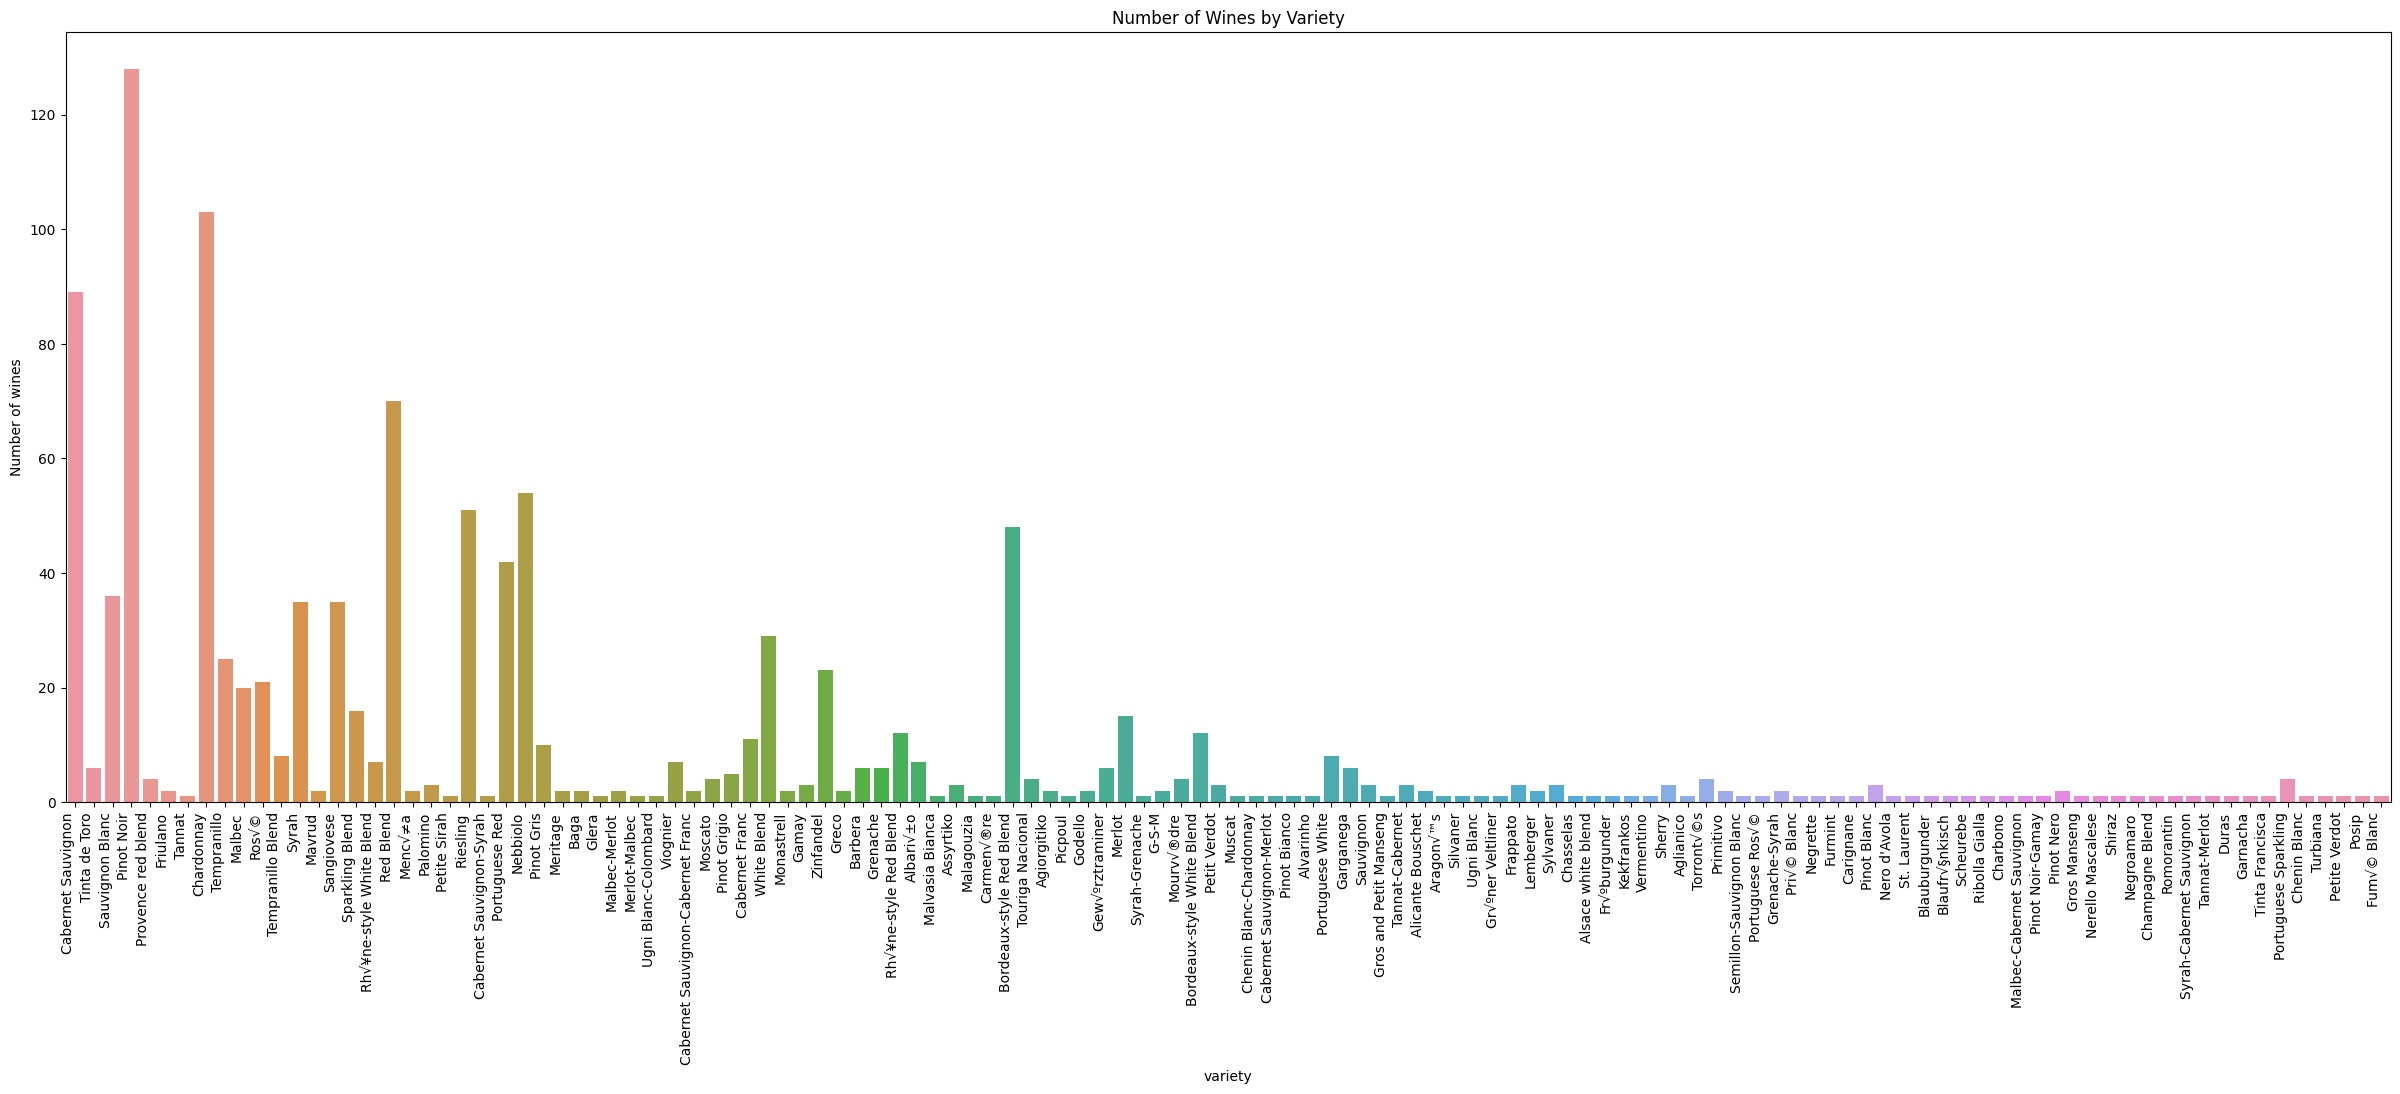

In [17]:
# Creating count plot

plt.rcParams['figure.figsize']=(30,10)
sns.countplot(x ='variety', data = wine)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
plt.title("Number of Wines by Variety")
plt.ylabel('Number of wines');

### Square Plot for Province

Number of province: 100


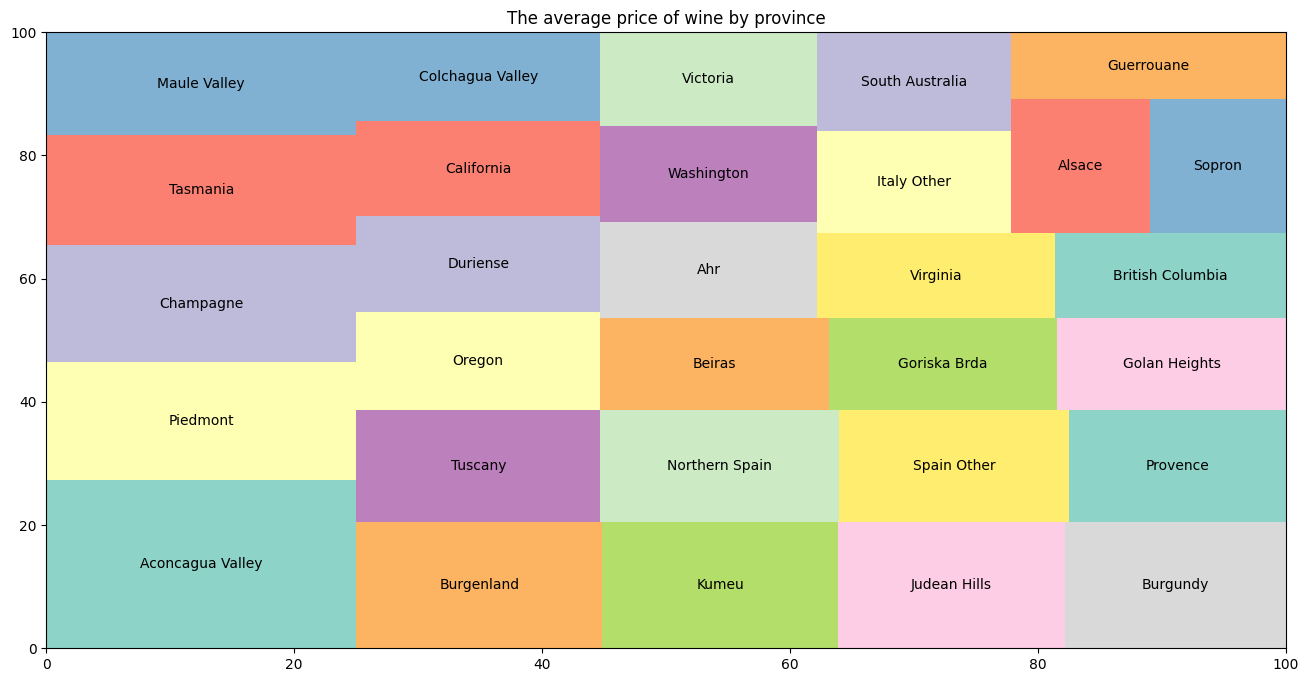

In [18]:
# Creating Square plot
print('Number of province:',wine['province'].nunique())
cnt = wine.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index,color= sns.color_palette('Set3'))
plt.title('The average price of wine by province');


### Barplot for Wine Distribution by Country

Numbers of countries in data: 22


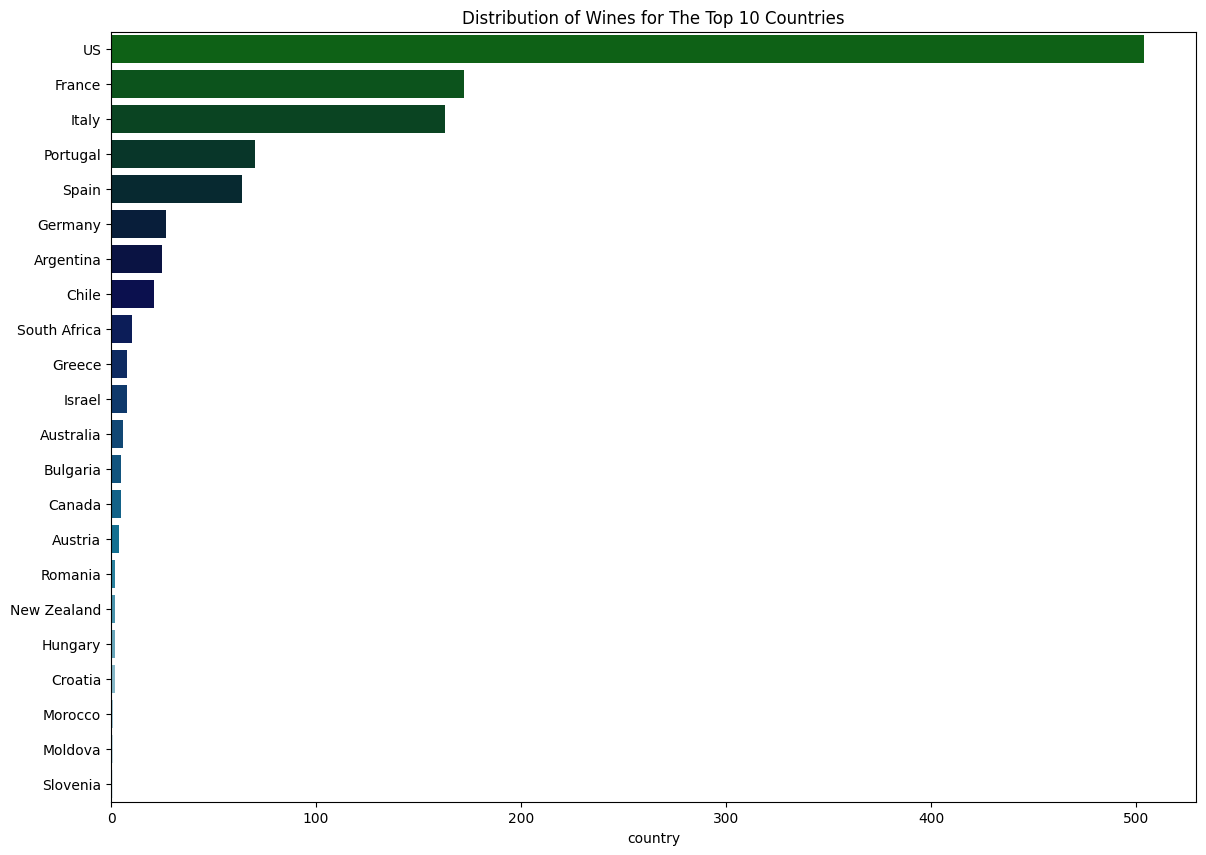

In [19]:
# Creating Bar plot
print('Numbers of countries in data:',wine['country'].nunique())
plt.figure(figsize=(14,10))
cnt = wine['country'].value_counts().to_frame()#[0:10]

#plt.xscale('log')
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Distribution of Wines for The Top 10 Countries');

### Histogram of Points Rating

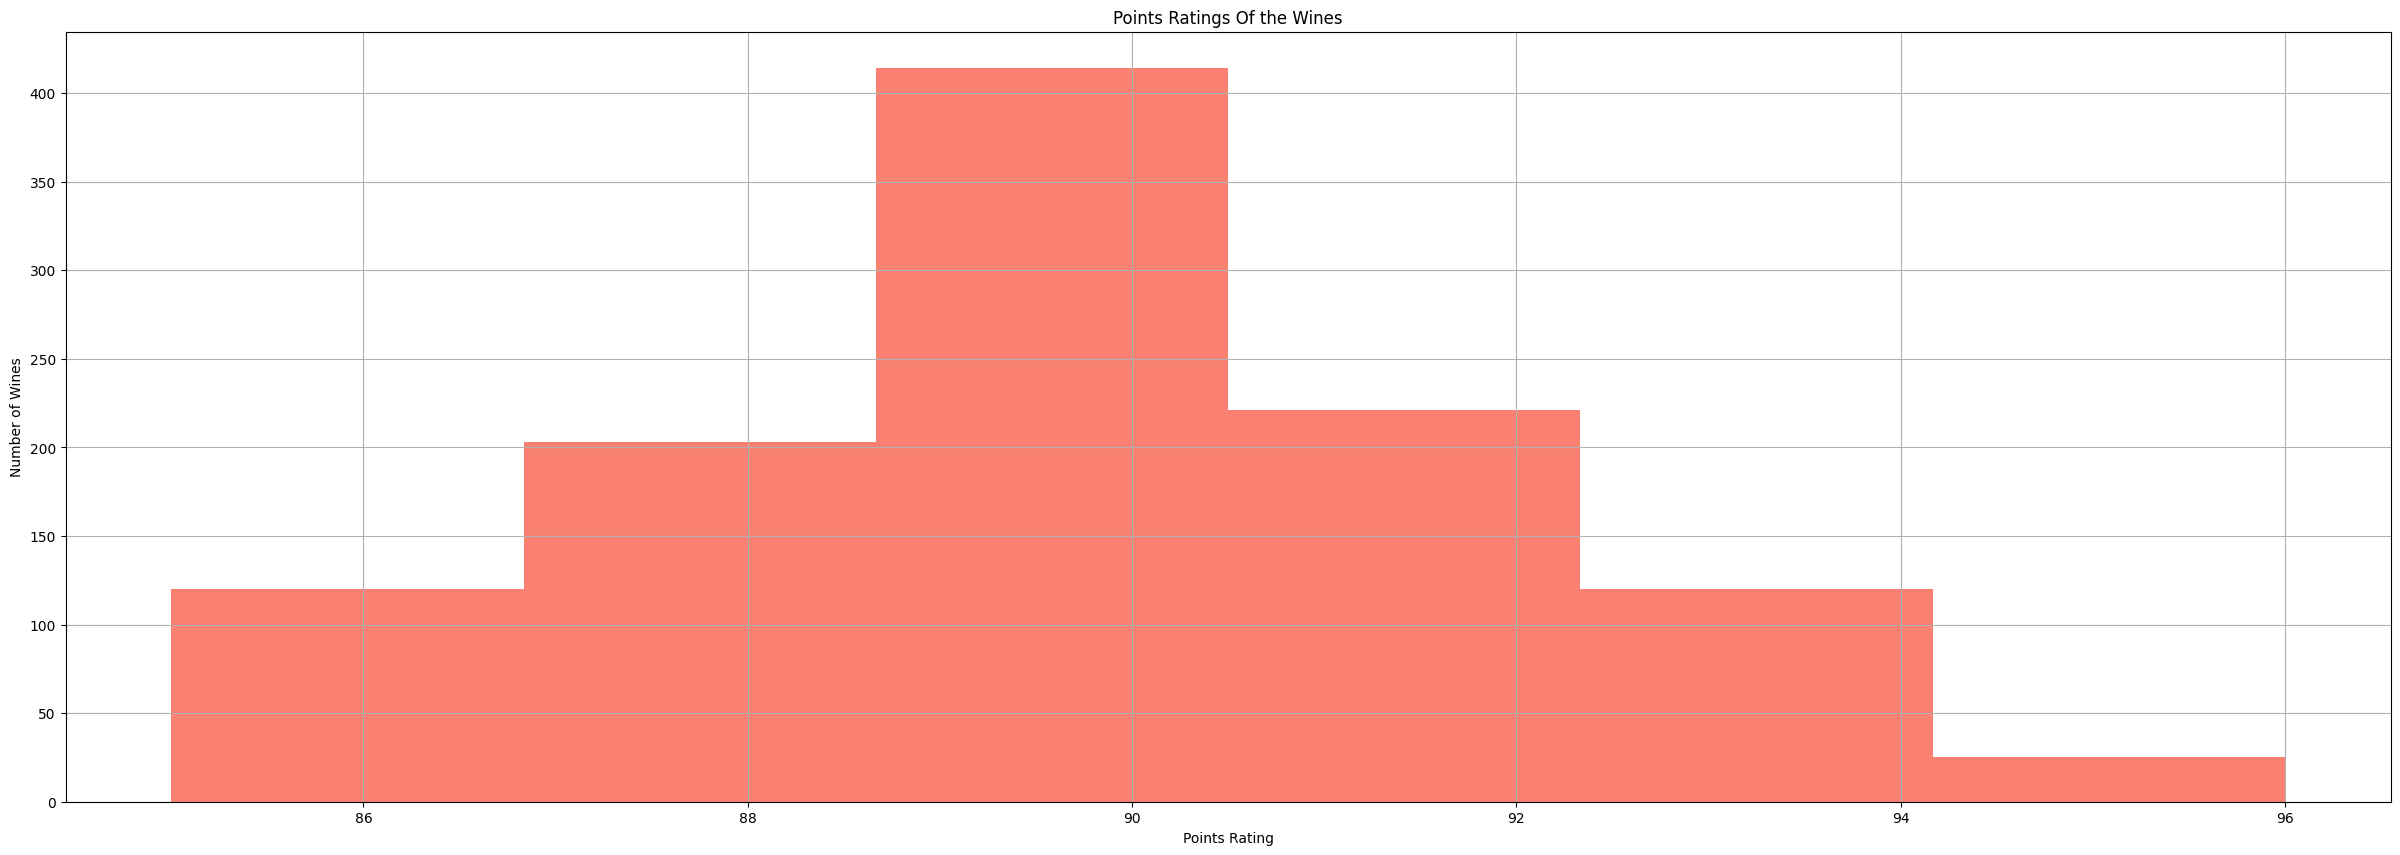

In [20]:
# Creating Histogram
wine.points.hist(bins=6,color='salmon');
plt.title("Points Ratings Of the Wines")
plt.ylabel('Number of Wines')
plt.xlabel('Points Rating');

### Distribution and Box Plot of Price

C:\Users\moona\AppData\Local\Temp\ipykernel_7572\3119205041.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['price'].fillna(wine['price'].mean()),color='purple',ax=ax1)


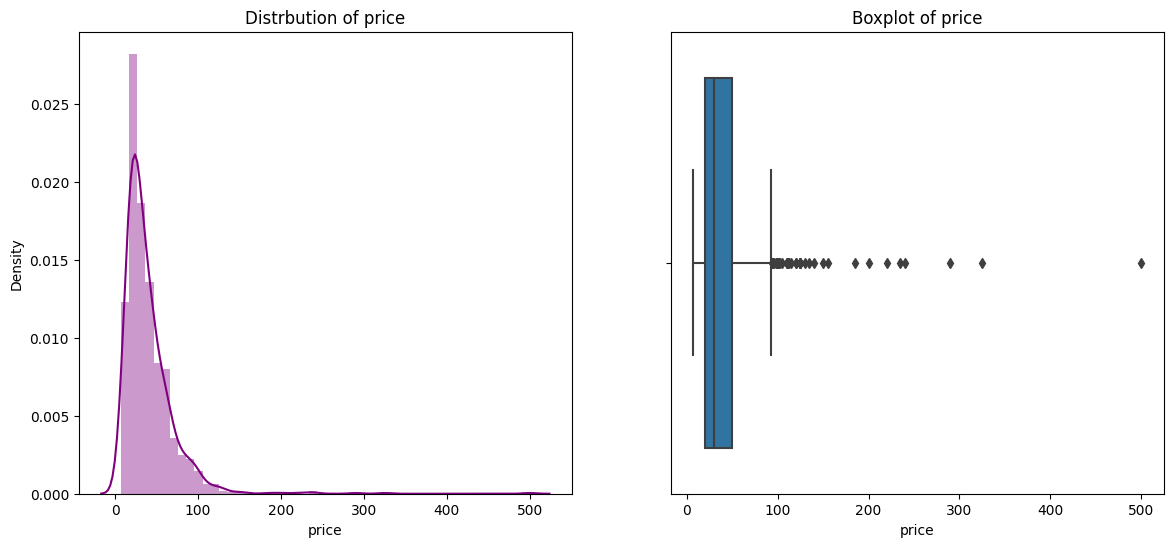

In [21]:
# Creating Distribution plot and Box plot
f, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.distplot(wine['price'].fillna(wine['price'].mean()),color='purple',ax=ax1)
ax1.set_title('Distrbution of price')
sns.boxplot(x = wine['price'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price');

### Observations

 - The varieties Red Blend, Caubernet Sauvignon and Malbec appear in the top five most expensive wines. The former two twice.
 
 - The three most populuar wines are 'Cabernet Sauvignon', 'Pinot Noir' and 'Chardonnay'

 - The Majority of wines are rated between 89 - 91 
 
 - The price of the wines ranges from 7 to 500.
 
 - The mean price is 40 and the median price is 31
 
 - There are many outliers
 




## Correlation Analysis

### Average Price by Country

C:\Users\moona\AppData\Local\Temp\ipykernel_7572\106379231.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cnt = wine.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()


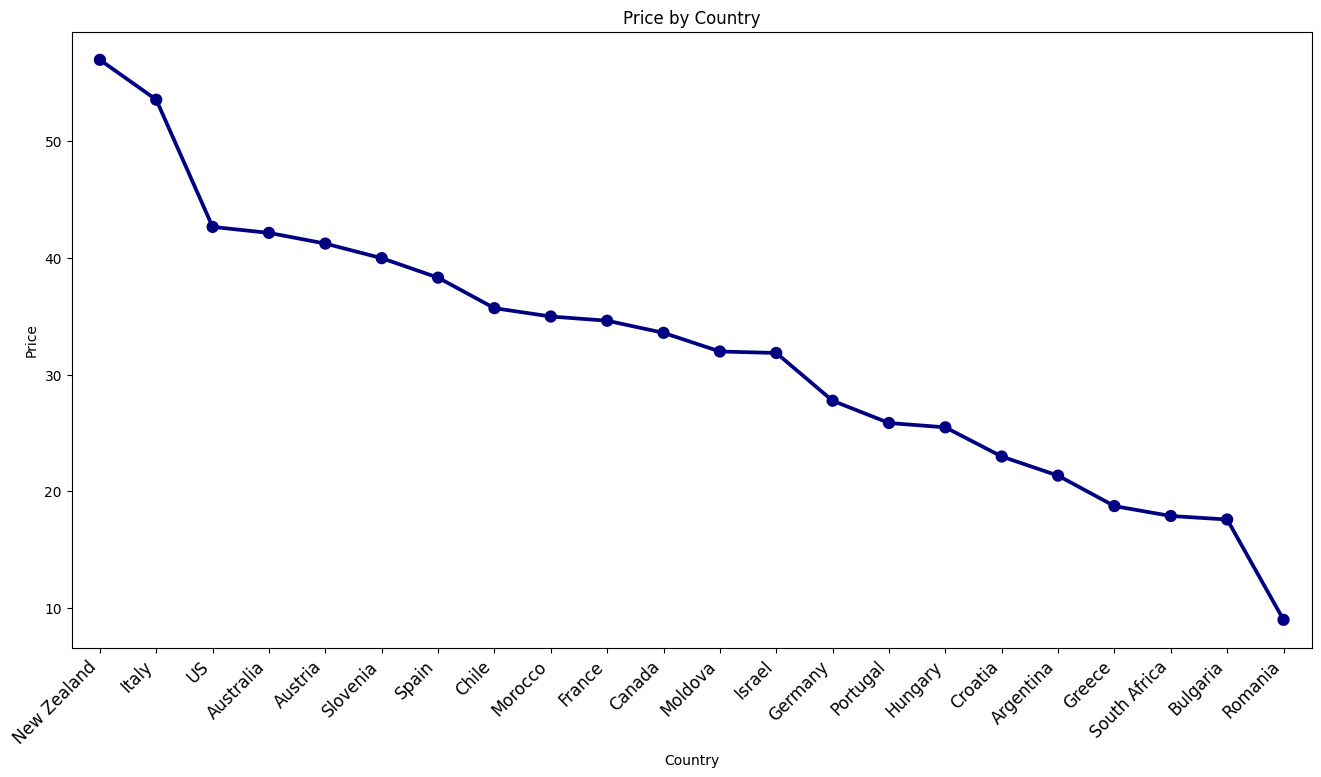

In [22]:
# Creating Point plot
cnt = wine.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt.index ,y = cnt['price'] ,color='navy',markers='o')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('Price by Country')
plt.xlabel('Country')
plt.ylabel('Price');

New Zealand, The US and Italy have the highest average. 

The US and Italy are also in the top three for producing the most expensive wines thus indicating a large range of values and outliers. 


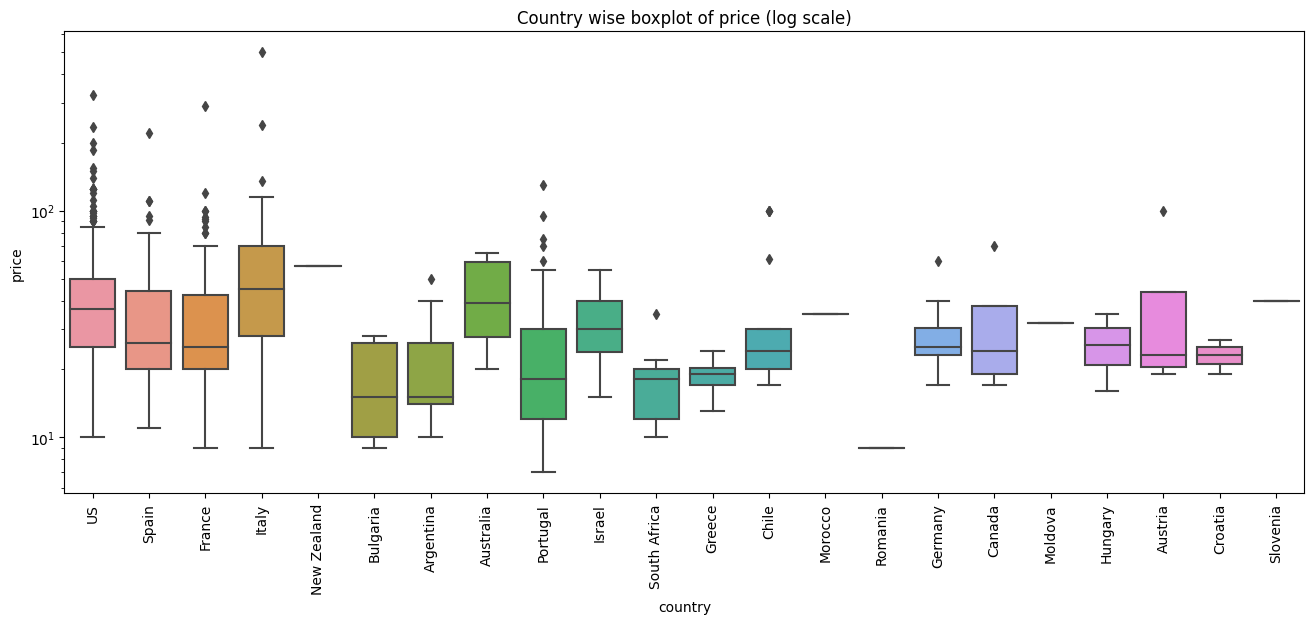

In [23]:
# Creating Box plot
plt.figure(figsize=(16,6))
sns.boxplot(x = wine['country'], y = wine['price'])
plt.yscale("log")
plt.title('Country wise boxplot of price (log scale)')
plt.xticks(rotation=90);

A Box Plot analysis provides a deeper undersanding of the price distribution for each country. As we can see there are many outliers and the range of the median between the countriees is low.  

### Price by Points Rating

C:\Users\moona\AppData\Local\Temp\ipykernel_7572\3790068267.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = wine.corr()


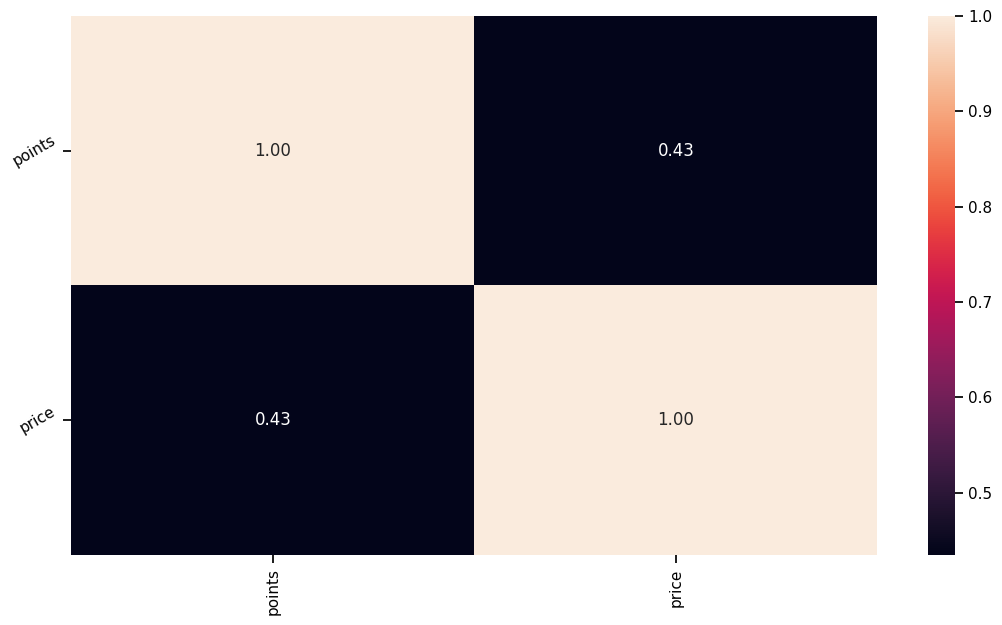

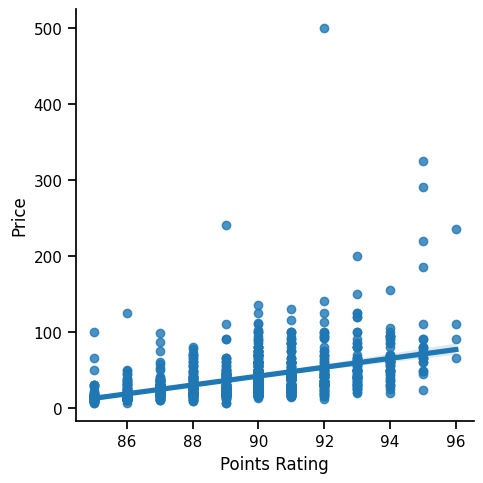

In [24]:
# Creating correlation heatmap
correlation = wine.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(correlation, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Creating lineplot with line of best fit
sns.lmplot(x='points', y='price', data=wine)
plt.xlabel('Points Rating')
plt.ylabel('Price');

From the line plot we can see that there is a positive correlation between the points and price, however it is shallow wih many outliers. The heat map shows a correlation value of 0.43 which suggests some correlation but not a significant one. We can investigate other variables to see how they relate to the price. 

### Square Plot Visualisation of Price by Region

Number of Regions: 216


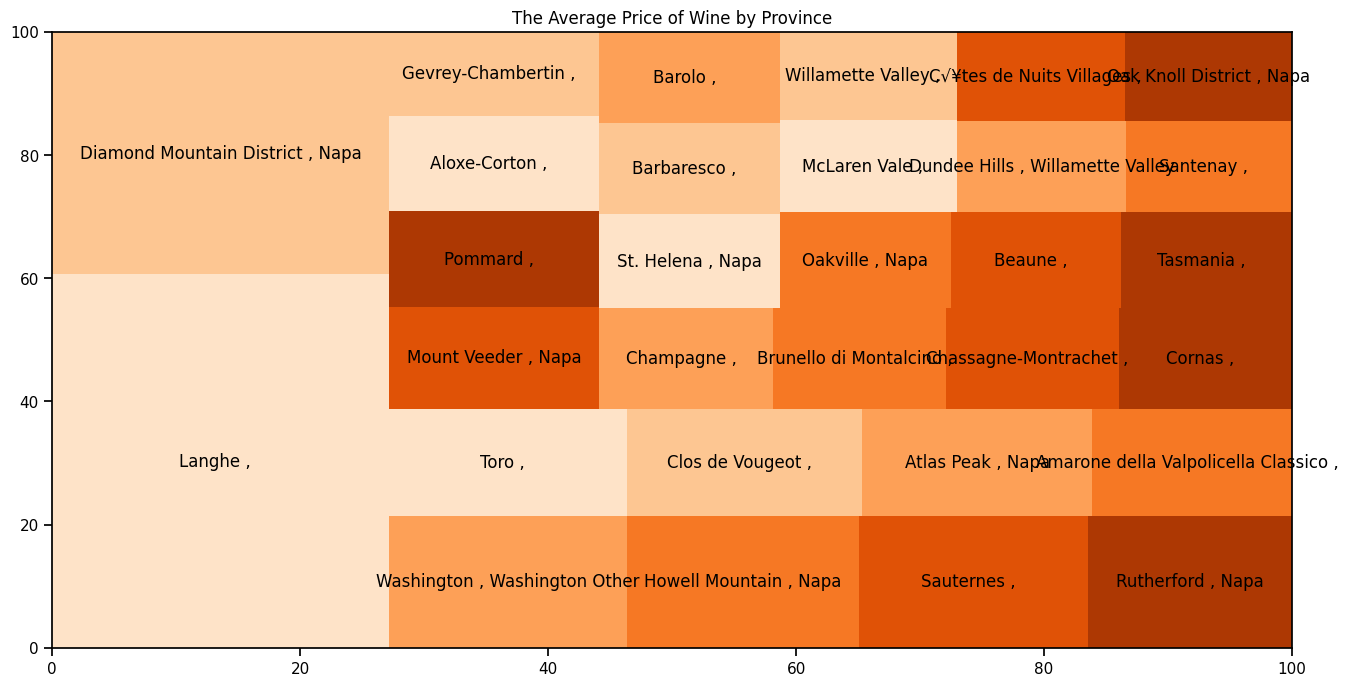

In [25]:
# Creating Square plot
print('Number of Regions:',wine['region'].nunique())
cnt = wine.groupby(['region'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index,color= sns.color_palette('Oranges'))
plt.title('The Average Price of Wine by Province');

We can see that the majority of regions have been grouped together on the square plot with very few regions in different areas. Thus we can infer that there is consistency in the price depending on the region it comes from thus the region does affect the price of the wine. 


### Multi Plot Visualisation of Price by Points

The top three most popular wines are Cabernet Sauvignon, Pinot Noir and Chardonnay. We can filter our dataset to visualise these varieties with their points rating.

In [26]:
# Filtering our dataset
wine['variety'].unique

wine_variety = wine.loc[(wine['variety'] == 'Cabernet Sauvignon') | (wine['variety'] == 'Pinot Noir') | (wine['variety'] == 'Chardonnay' )]
wine_variety.head()

,country,points,price,province,variety,region
0,US,96,235.0,California,Cabernet Sauvignon,"Napa Valley , Napa"
3,US,96,65.0,Oregon,Pinot Noir,"Willamette Valley , Willamette Valley"
8,US,95,65.0,Oregon,Pinot Noir,"Chehalem Mountains , Willamette Valley"
9,US,95,60.0,California,Pinot Noir,"Sonoma Coast , Sonoma"
11,US,95,48.0,Oregon,Pinot Noir,"Ribbon Ridge , Willamette Valley"


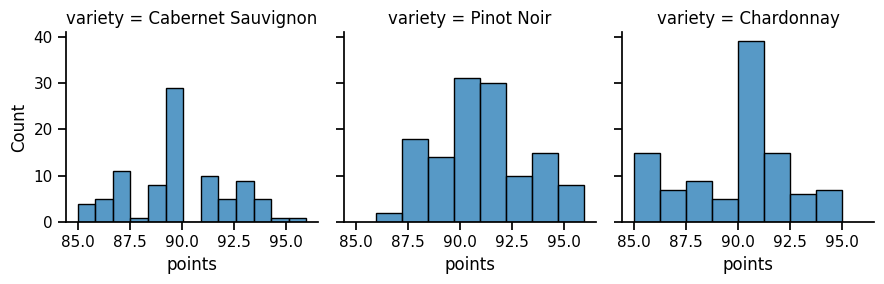

In [27]:
# Creating a multiplot with histograms
fg = sns.FacetGrid(wine_variety, col="variety")
fg.map(sns.histplot, "points");

From the graphs we can see that the 'Chardonnay' variety has the highest count for 90 points rating it does not have any wines rated above 95 points.

The 'Pinot Noir' is the most consistent for points overall and has the highest count for wines that are rated over 95 points. 

The 'Cabernet Sauvignon' is somewhat inconsistent in it's points however it does have a few that are also rated above 90 points.

## Summary

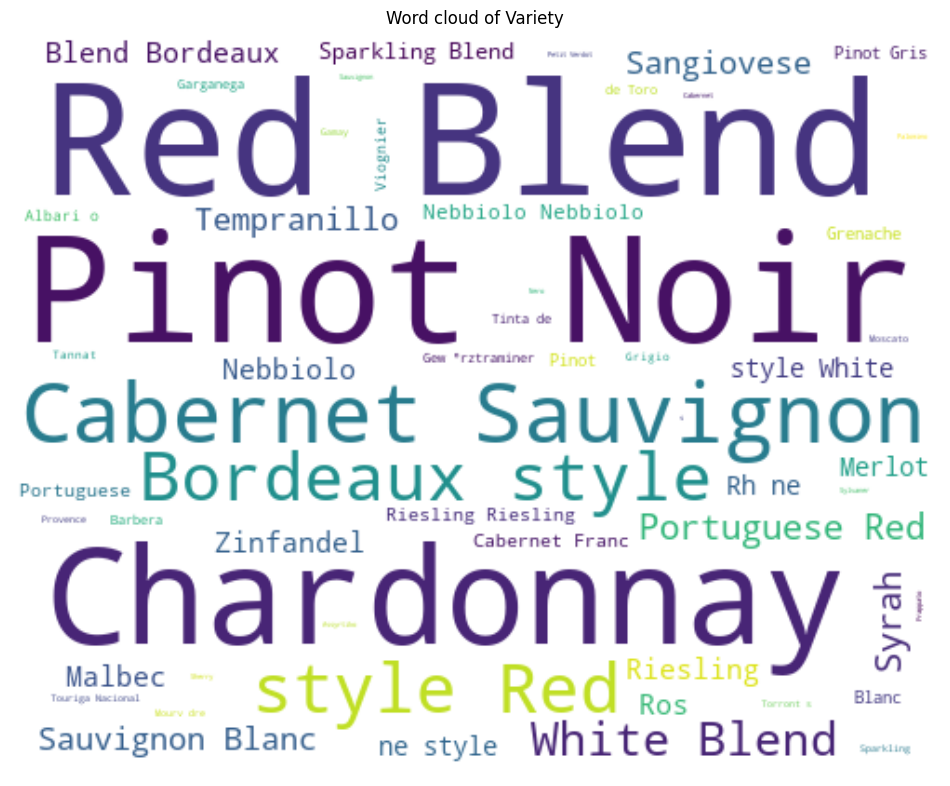

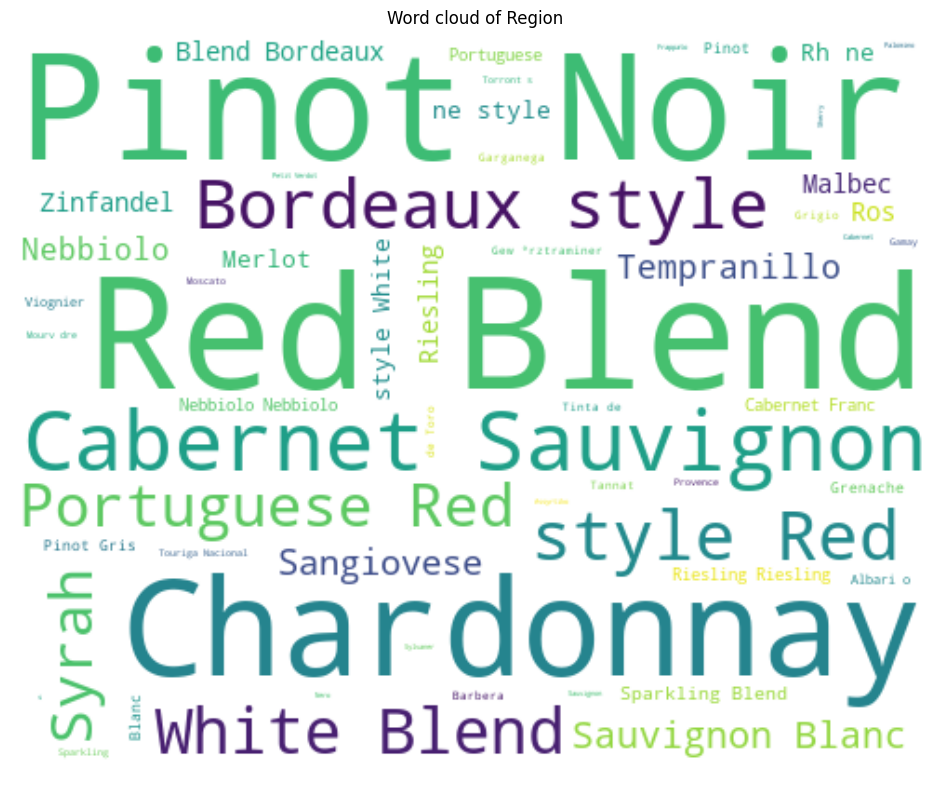

In [28]:
# Wordcloud overview of variety
plt.figure(figsize = (12, 12))
plt.title('Word cloud of Variety')
text = ' '.join(wine['variety'].fillna('').values)
wordcloud = WordCloud(margin=10, background_color='white', width=500, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Wordcloud overview of variety
plt.figure(figsize = (12, 12))
plt.title('Word cloud of Region')
text = ' '.join(wine['variety'].fillna('').values)
wordcloud = WordCloud(margin=10, background_color='white', width=500, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



### Analysis of the data set provides:

 - How the data set is distributed

 - Correlation and relationships between different variables and features
 
 - Price: The facors affecting the price of a wine and how this relates to other variables
 
 - Points: The facors affecting the points rating of a wine and how this relates to other variables
 
 - Word Clouds to provide overview of the dataset
